# Tutorial things for SKLearn, Numpy, Numba etc.

https://www.youtube.com/watch?v=BoaHul6TXCE

In [1]:
import time
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
from datetime import datetime
import cufflinks
import numba as nb
from scipy.optimize import least_squares, curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neural_network import MLPRegressor
from typing import Callable

from functions import (get_waveforms,
                       get_pred_func,
                       parfunc_arr,
                       fit_parabolas,
                       pred_fig,
                       pred_trace,
                       corr_fig,
                       corr_trace,
                       mlp_reg_fig,
                       mlp_reg_trace,
                       plot_transform)

cufflinks.go_offline()

data0 = pd.read_csv("C:/Users/lenovo/Downloads/20231110-Na22-d0-12-ML-Tz6-100ns-ecf-06.csv")
# data1 = pd.read_csv("C:/Users/lenovo/Downloads/ML_waveforms.csv")
# data2 = pd.read_csv("C:/Users/lenovo/Downloads/ML_waveforms-E_dt.csv")
# data3 = pd.read_csv("C:/Users/lenovo/Downloads/ML_waveforms-E_dt-allch.csv")

display_all = 1
if display_all:
    display(data0) # Ch, E, dT, s0 ... s127
    display(data0[data0["Ch"] != 0])
    # display(data1)
    # display(data2)
    # display(data3)

,Ch,E,dT,s0,s1,s2,s3,s4,s5,s6,...,s118,s119,s120,s121,s122,s123,s124,s125,s126,s127
0,0,11151,21.5253,-0.001402,0.000753,-0.000868,0.000753,-0.003557,0.000753,0.001287,...,0.967470,0.968080,0.968156,0.968786,0.971551,0.975404,0.974947,0.978780,0.978342,0.981641
1,0,11110,22.5801,-0.002184,-0.000029,0.001593,-0.001116,-0.003271,-0.000563,-0.004339,...,0.864071,0.866855,0.875553,0.883202,0.883259,0.890908,0.897450,0.900769,0.906777,0.908474
2,0,11201,30.7639,0.002108,0.001040,-0.000029,0.002642,0.003195,0.002642,0.003195,...,0.943704,0.947538,0.951886,0.952516,0.957952,0.957494,0.958104,0.965143,0.966306,0.967451
3,0,11100,24.7800,0.001020,-0.000067,-0.001688,0.000467,-0.000067,0.001020,0.001020,...,0.922742,0.929303,0.931001,0.935407,0.937104,0.939889,0.943742,0.945993,0.949846,0.954786
4,0,11151,30.2933,-0.001001,0.000067,0.000601,-0.000467,0.000067,0.002222,-0.002623,...,0.978933,0.981699,0.979639,0.982939,0.983034,0.984178,0.985876,0.983282,0.989805,0.986658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18657,0,11184,26.4297,-0.000544,0.001059,0.000525,0.001059,-0.000010,0.001593,-0.000544,...,0.944696,0.945306,0.949674,0.949216,0.953584,0.954213,0.959115,0.961347,0.960889,0.966325
18658,0,11167,26.9521,-0.000086,0.000982,-0.001154,0.001535,0.000448,0.001535,0.002070,...,0.980993,0.982137,0.980612,0.983911,0.988298,0.986772,0.987917,0.990148,0.989157,0.991922
18659,0,11217,50.9769,0.000105,-0.000429,-0.000963,-0.002584,-0.001497,-0.001497,-0.001497,...,0.662118,0.675546,0.692178,0.702935,0.719568,0.734617,0.748045,0.764162,0.779192,0.787280
18660,0,11168,33.5123,-0.002737,-0.001669,0.000486,0.000486,0.000486,0.002642,0.001020,...,0.970579,0.969587,0.973421,0.972429,0.973592,0.975271,0.979658,0.977598,0.980898,0.980440


,Ch,E,dT,s0,s1,s2,s3,s4,s5,s6,...,s118,s119,s120,s121,s122,s123,s124,s125,s126,s127


In [2]:
# Generalised logistic function
logfunc = lambda t, B, v, t_0: (1+np.exp(-B*(t-t_0)))**(-1/v)
logfunc_127 = lambda t, B, v, t_0: (1+np.exp(-B*(t/127-t_0)))**(-1/v)
t_0_shift = lambda B, v, xy_tup: xy_tup[0] + np.log(xy_tup[1]**(-v) - 1) / B
logfunc_xy = lambda t, B, v, xy_tup: (1+np.exp(-B*(t-t_0_shift(B, v, xy_tup))))**(-1/v)

col_for_str = lambda df, col: [c for c in df.columns if col in c][0]
# waveform = lambda df: {f"[{cn}]": df[col_for_colnum(df, cn)] for cn in range(len(df.columns))}
colcontains = lambda df, contains: df[col_for_str(df, contains)]
# t_0_shift = lambda B, v: 0.5 + math.log(0.5**(-v) - 1) / B

df = get_waveforms(3,5, source_data=data0)
for col in df.columns:
    df[col+" slope"] = df[col].diff()
#3
df["Logfunc3"] = [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)]
# df["Logfunc3_0"] = [logfunc_xy(t/127, 5, 0.1, (60/127,0.512045)) for t in range(0,128)]
#4
df["Logfunc4"] = [logfunc_xy(t/127, 7, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)]
# df["Logfunc4_0"] = [logfunc_xy(t/127, 7.2, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)]
df["Noise3"] = colcontains(df, "[3]") - df["Logfunc3"]
df["Noise4"] =colcontains(df, "[4]") - df["Logfunc4"]
square_sum = lambda series: (series*series).sum()
print(square_sum(df["Noise3"]),square_sum(df["Noise4"]))
#[["Noise3", "Noise4"]]
df.iplot(title="Example waveforms from the data")
get_waveforms(0,100, source_data=data0).iplot(title="First 100 waveforms")

0.059694238404952915 0.019249915262777147


In [3]:
# Try finding regression parameters using SciPy model fit

x_data = np.arange(0,128)
waveform = [3]
wave_df, imap = get_waveforms(waveform, source_data=data0, get_indices_map=True)
y_data = wave_df[imap[waveform[0]]]
B0, v0, x0, y0 = 4, 0.001, 60, y_data[60]
print(B0, v0, x0, y0, "timeshift", t_0_shift(B0, v0, (x0, y0)))



# plt.plot(x_data, y_data, 'b-', label='data with noise')

popt, pcov = curve_fit(logfunc_127, x_data, y_data, bounds=([0., 0.0001, -0.8], [10., 1., 0.8]))
print(popt, pcov)

# plt.plot(x_data, func(x_data, *popt), 'g--',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.7f' % tuple(popt))
wave_df[str(waveform)+' fit: B=%5.3f, v=%5.3f, t_0=%5.3f' % tuple(popt)] = logfunc_127(x_data, *popt)
wave_df['original fit'] = [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)] #[3]
# wave_df['original fit'] = [logfunc_xy(t/127, 7, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)] #[4]
wave_df["Noise original fit"] = colcontains(wave_df,str(waveform)) - wave_df['original fit']
wave_df["Noise fit"] = colcontains(wave_df,str(waveform)) - wave_df[str(waveform)+' fit: B=%5.3f, v=%5.3f, t_0=%5.3f' % tuple(popt)]
print("New fit:", square_sum(wave_df["Noise fit"]), "Original fit:", square_sum(wave_df["Noise original fit"]))
print("New fit:", np.sqrt(square_sum(wave_df["Noise fit"]))/128, "Original fit:", np.sqrt(square_sum(wave_df["Noise original fit"]))/128)

fig = wave_df.iplot(asFigure=True)
print((160-float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0]))/4)
fig.add_vline(x=(160-float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0]))/4, line_color="orange")

# plt.plot(x_data, [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)], 'r-', label='original fit')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

# DOESNT OPTIMIZE :((
# params = curve_fit(logfunc_127, x_data, y_data, p0 = [B0, v0, t_0_shift(B0, v0, (x0, y0))], bounds=([0., 0.1, -0.5], [10., 1., 60.0]))
# print(params)
# least_squares(logfunc, x0 = , )

4 0.001 60 0.512045 timeshift 58.1727801046308
[ 4.93116070e+00  2.67731796e-03 -7.99999999e-01] [[9.81559651e-03 3.89007551e-03 2.97540500e-01]
 [3.89007551e-03 1.92668054e-03 1.47119405e-01]
 [2.97540500e-01 1.47119405e-01 1.12340196e+01]]
New fit: 0.038516006791716864 Original fit: 0.059694238404952915
New fit: 0.001533241824585574 Original fit: 0.0019087815926058832
33.805


In [4]:
# ['[190]', '[528]', '[536]', '[715]', '[1035]', '[1536]', '[1780]', '[2111]',       <---- Pathologic waveforms
# '[2278]', '[2581]', '[2759]', '[2927]', '[3017]', '[3605]', '[3704]', '[3812]', 
# '[4066]', '[4658]', '[4797]', '[5517]', '[5633]', '[5677]', '[5777]', '[6085]',
# '[6250]', '[6261]', '[6755]', '[6887]', '[7023]', '[7038]', '[7674]', '[7827]',
# '[8129]', '[8573]', '[9606]', '[9608]', '[10356]', '[10550]', '[10626]', '[10686]',
# '[10979]', '[11017]', '[11915]', '[12050]', '[12141]', '[12251]', '[12306]', '[12655]',
# '[12879]', '[13504]', '[13977]', '[14159]', '[14345]', '[14598]', '[14758]', '[14854]',
# '[15700]', '[15798]', '[15841]', '[16000]', '[16100]', '[16181]', '[16403]', '[16595]',
# '[16909]', '[18015]', '[18074]', '[18409]', '[18648]']
waveform = [4066]
wave_df, imap = get_waveforms(waveform, source_data=data0, get_indices_map=True)

part = wave_df[wave_df[imap[waveform[0]]] <= 0.2][imap[waveform[0]]]
x_data = np.arange(0,len(part))
y_data = part
b_exp = lambda x, b, x_0: b**(x-x_0)
c_par = lambda x, a, x_0: a * (max(x - x_0,0))**2
c_par_arr = lambda x, a, x_0: np.array([c_par(x_,a,x_0) for x_ in x])

# Exp fit
popt, pcov = curve_fit(b_exp, x_data, y_data, bounds=([0.1, -10], [10, 70]))
print(popt, pcov)
wave_df['fit: b=%5.3f x_0=%5.3f' % tuple(popt)] = np.nan
wave_df['fit: b=%5.3f x_0=%5.3f' % tuple(popt)].iloc[:len(part)] = b_exp(x_data, *popt)
# Parabola fit
popt, pcov = curve_fit(c_par_arr, x_data, y_data, bounds=([-3, -10], [3, 40]))
print(popt)
wave_df['fit: a=%5.3f x_0=%5.3f' % tuple(popt)] = np.nan
wave_df['fit: a=%5.3f x_0=%5.3f' % tuple(popt)].iloc[:len(part)] = c_par_arr(x_data, *popt)
# wave_df['manual fit'] = b_exp(np.arange(0,len(wave_df)), 1.17, 47)
fig2 = wave_df.iplot(asFigure=True)
fig2.add_vline(x=(160-float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0]))/4, line_color="orange")

[ 1.08822604 68.78912098] [[ 1.41149802e-05 -3.56049674e-03]
 [-3.56049674e-03  9.55621242e-01]]
[1.60415262e-04 1.52186694e+01]


In [5]:
# display(data0) # 18662 rows
start = datetime.now()
new_max_col = 2047
df = get_waveforms(0,2047, source_data=data0)

print(datetime.now() - start, "elapsed while getting waveforms")
df_new, df_results = df_with_fits(df, 0.2, return_results=True, force_max_col=new_max_col)
print(datetime.now() - start, "elapsed while getting waveforms & fitting parabolas")
# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
# start = time.perf_counter()
# fit_parabolas(df, 0.2, force_max_col=new_max_col)
# end = time.perf_counter()
# print("Elapsed (with compilation) = {}s".format((end - start)))

# # NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
# start = time.perf_counter()
# fit_parabolas(df, 0.2, force_max_col=new_max_col)
# end = time.perf_counter()
# print("Elapsed (after compilation) = {}s".format((end - start)))

start = time.perf_counter()
recalc_low_acc_results = fit_parabolas(df[[col for col in df.columns if sum([i in col for i in df_results[df_results["x0_cutoff_var"] > 0.00002].index]) > 0]], 0.1, force_max_col=new_max_col)
end = time.perf_counter()
print(f"Elapsed for recalculating inaccurate ones (after compilation) = {end - start:.3f}s")

0:00:00.020419 elapsed while getting waveforms


NameError: name 'df_with_fits' is not defined

,a,x0,x_cutoff,var,x0_cutoff_var,xT,yT_fit,final10_slope
[190],0.000594,18.493642,38,0.000006,0.000008,-4.234250,0.000000,0.003224
[191],0.000335,17.467860,43,0.000015,0.000023,34.537425,0.097478,0.004156


,a,x0,x_cutoff,var,x0_cutoff_var,xT,yT_fit,final10_slope
[1],0.000424,18.100949,41,0.000019,0.000029,34.354975,0.112114,0.005185
[18],0.000146,13.837960,52,0.000026,0.000032,31.832325,0.047424,0.002750
[23],0.000228,15.627768,47,0.000018,0.000023,32.591075,0.065536,0.002776
[29],0.000168,13.886656,50,0.000026,0.000034,33.532575,0.064806,0.003690
[43],0.000092,12.206815,60,0.000020,0.000025,31.861775,0.035523,0.005403
...,...,...,...,...,...,...,...,...
[1977],0.000597,18.638769,38,0.000015,0.000022,33.505375,0.131846,0.004295
[1982],0.000296,16.687325,44,0.000018,0.000024,33.665325,0.085290,0.004852
[1986],0.000257,16.057709,45,0.000017,0.000024,33.253250,0.075849,0.002948
[2021],0.000169,14.894075,51,0.000030,0.000039,33.775400,0.060231,0.005777


df_results: [-2854.2056612     16.84769242] [[ 8.34042270e+04 -2.64544979e+01]
 [-2.64544979e+01  1.21014362e-02]] 
x0,y0 - x1,y1: (0, 16.847692418564144) (0.001, 13.993486757362483)


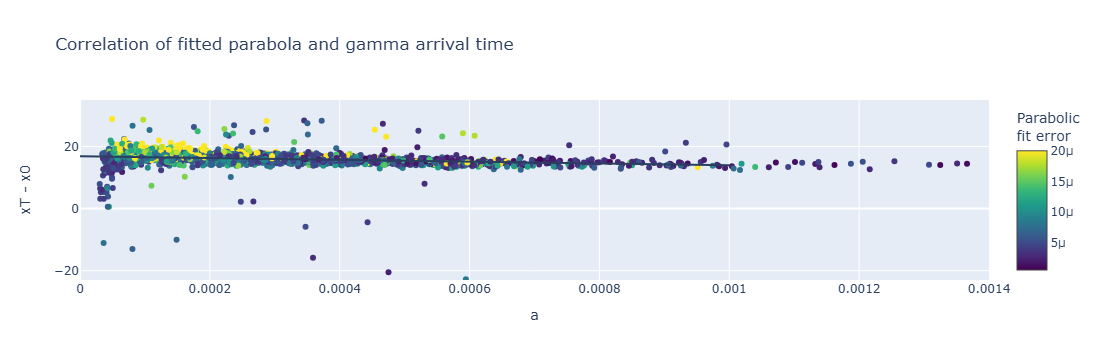

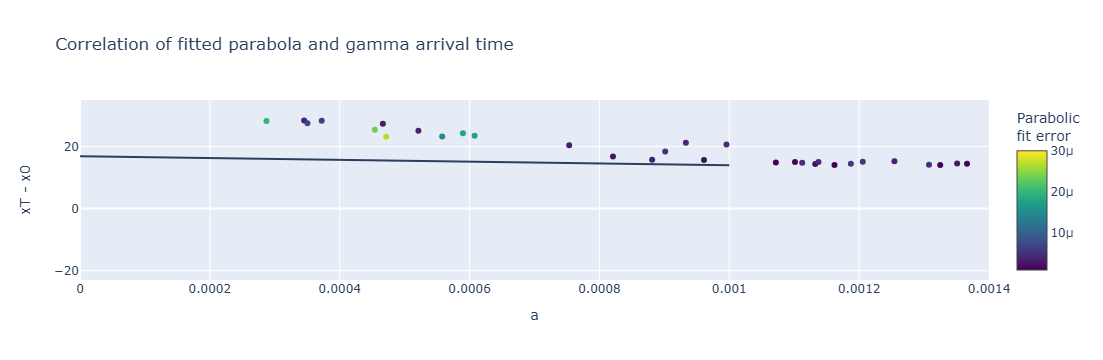

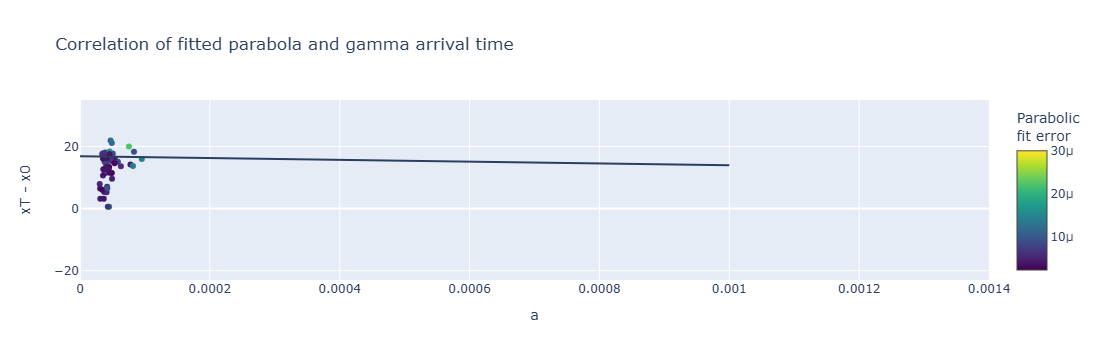

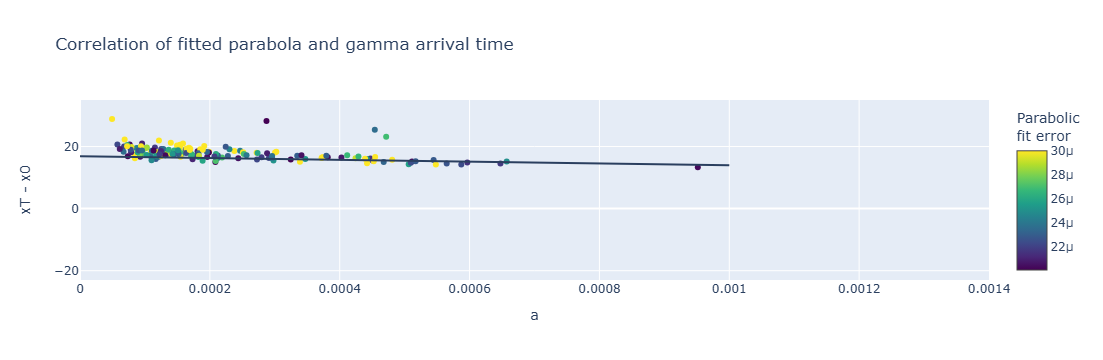

In [6]:
low_acc_results = df_results[df_results["x0_cutoff_var"] > 0.00002]
past_cutoff_results = df_results[df_results["x_cutoff"] < df_results["xT"]]
parabola_results = df_results[df_results["final10_slope"] > 0.013]
notable_results = pd.concat([low_acc_results, past_cutoff_results],axis=0)
# Replace the low accuracy results with the new 'recalc_low_acc_results' values
updated_results = pd.concat([df_results[df_results["x0_cutoff_var"] <= 0.00002], recalc_low_acc_results],axis=0)

display(df_results["[190]":"[191]"])
# display(recal_low_acc_results)
display(low_acc_results)
# display(parabola_results)
# df_new[[col for col in df_new.columns if sum([i in col for i in notable_results.index]+["[190]" in col]) >= 1]].iplot()
kwargs = {"yaxis_range":[-23,35], "xaxis_range":[0, .0014]}

fig0 = corr_fig(df_results, [], (None, 2e-5), **kwargs)
popt0, pcov0 = curve_fit(lambda x, m, b: m*x + b, df_results["a"], df_results["xT"]-df_results["x0"], bounds=([-10000, 1], [10, 20]))
print("df_results:", popt0, pcov0, "\nx0,y0 - x1,y1:", (0,popt0[1]), (0.001, popt0[0]/1000+popt0[1]))
fig0.update_layout(shapes = [{'type': 'line', 'yref': 'y', 'xref': 'x', 'y0': popt0[1], 'y1': popt0[0]/1000+popt0[1], 'x0': 0, 'x1': 0.001}])
fig0.show()

corr_fig(past_cutoff_results, **kwargs).update_layout(shapes = [{'type': 'line', 'yref': 'y', 'xref': 'x', 'y0': popt0[1], 'y1': popt0[0]/1000+popt0[1], 'x0': 0, 'x1': 0.001}]).show()
corr_fig(parabola_results, **kwargs).update_layout(shapes = [{'type': 'line', 'yref': 'y', 'xref': 'x', 'y0': popt0[1], 'y1': popt0[0]/1000+popt0[1], 'x0': 0, 'x1': 0.001}]).show()
corr_fig(low_acc_results, **kwargs).update_layout(shapes = [{'type': 'line', 'yref': 'y', 'xref': 'x', 'y0': popt0[1], 'y1': popt0[0]/1000+popt0[1], 'x0': 0, 'x1': 0.001}]).show()

# fig2 = corr_fig(updated_results, [], (None, 2e-5), **kwargs)
# popt1, pcov1 = curve_fit(lambda x, m, b: m*x + b, updated_results["a"], updated_results["xT"]-updated_results["x0"], bounds=([-10000, 1], [10, 20]))
# print("updated_results:", popt1, pcov1, "\nx0,y0 - x1,y1:", (0,popt1[1]), (0.001, popt1[0]/1000+popt1[1]))
# fig2.update_layout(shapes = [{'type': 'line', 'yref': 'y', 'xref': 'x', 'y0': popt1[1], 'y1': popt1[0]/1000+popt1[1], 'x0': 0, 'x1': 0.001}])
# fig2.show() #  "line_dash":"dash"


In [6]:
display(df_results)
# px.scatter(df_results[["xT_prd_0", "xT"]])

# updated_results or df_results
drop_cols = list(df_results[df_results["xT"] - df_results["x0"] < 3].index)
print(drop_cols)
drop_extra_cols = list(past_cutoff_results.index)+list(parabola_results.index)
pred_fig(df_results, drop_cols, get_pred_func(df_results, [])).show()
pred_fig(df_results, drop_cols+drop_extra_cols, get_pred_func(df_results, drop_cols+drop_extra_cols)).show()
print("Updated results:")
pred_fig(updated_results, drop_cols, get_pred_func(updated_results, drop_cols)).show()
pred_fig(updated_results, drop_cols+drop_extra_cols, get_pred_func(updated_results, drop_cols+drop_extra_cols)).show()

NameError: name 'df_results' is not defined

In [7]:
# Example to see training data structure
# digits = load_digits()
# data = digits["data"]
# print("data:\n",data)
# print("shape:",data.shape)
# print("first and second digit:\n", data[0:2])
# print("first and second digit, first 10 pixels:\n", data[0:2, :10])
# labels = digits["target"]
# print("labels:",labels)
data_df = get_waveforms(0, len(data0), source_data=data0, get_indices_map=False)
data = data_df.values.transpose()
labels = np.array([(160-float([s[s.find("]")+1:s.find("dT")] for s in [col.replace(" ","")]][0]))/4 for col in data_df.columns])
wave_i = np.array([int(col[col.find("[")+1:col.find("]")]) for col in data_df.columns])
cutoff_xT = 15

data_removed = data[labels <= cutoff_xT]
labels_removed = labels[labels <= cutoff_xT]

data_skimmed = data[labels > cutoff_xT]
labels_skimmed = labels[labels > cutoff_xT]
wave_i_skimmed = wave_i[labels > cutoff_xT]
print("labels_skimmed length:", labels_skimmed.shape)
print("removed labels:", labels_removed.shape)
print("removed wave indices:", [f"[{i}]" for i in wave_i[labels < cutoff_xT]])
removed_dict = {k:round(v,2) for (k,v) in zip(wave_i[labels <= cutoff_xT], labels[labels <= cutoff_xT])}
removed_dict2 = {k:v for k,v in removed_dict.items() if v > 10}
print("removed wave indices:labels", removed_dict2)
# # display(data_df)
# print("data values:\n", data)
# print("data shape:", data.shape)
# print("data_skimmed shape:", data_skimmed.shape)
# print("first and second waveform:\n", [len(wave) for wave in data[0:2]])
# print("first and second waveform, first 10 values:\n", data[0:2, :10])
print("labels:",len(labels))
data_df[[col for col in data_df.columns if int(col[col.find("[")+1:col.find("]")]) in removed_dict2.keys()]].iplot()

labels_skimmed length: (18593,)
removed labels: (69,)
removed wave indices: ['[190]', '[528]', '[536]', '[715]', '[1035]', '[1536]', '[1780]', '[2111]', '[2278]', '[2581]', '[2759]', '[2927]', '[3017]', '[3605]', '[3704]', '[3812]', '[4066]', '[4658]', '[4797]', '[5517]', '[5633]', '[5677]', '[5777]', '[6085]', '[6250]', '[6261]', '[6755]', '[6887]', '[7023]', '[7038]', '[7674]', '[7827]', '[8129]', '[8573]', '[9606]', '[9608]', '[10356]', '[10550]', '[10626]', '[10686]', '[10979]', '[11017]', '[11915]', '[12050]', '[12141]', '[12251]', '[12306]', '[12655]', '[12879]', '[13504]', '[13977]', '[14159]', '[14345]', '[14598]', '[14758]', '[14854]', '[15700]', '[15798]', '[15841]', '[16000]', '[16100]', '[16181]', '[16403]', '[16595]', '[16909]', '[18015]', '[18074]', '[18409]', '[18648]']
removed wave indices:labels {1536: 10.68, 1780: 12.2, 2111: 13.15, 3704: 11.4, 3812: 13.48, 4658: 14.78, 6261: 10.49, 7023: 14.64, 8129: 13.69, 10550: 13.9, 10626: 12.43, 10686: 13.94, 10979: 14.94, 11017

In [8]:
n_components = 12
data_trans = PCA(n_components).fit_transform(data)
data_skimmed = data_trans[labels > cutoff_xT]
data_removed = data_trans[labels <= cutoff_xT]
idx = round(len(labels_skimmed)/2)
data_train, data_test, labels_train, labels_test = data_skimmed[:idx], data_skimmed[idx:], labels_skimmed[:idx], labels_skimmed[idx:]
print(labels_train.shape, labels_test.shape)
plot_transform(data_trans, n_components, 1)

regr = MLPRegressor(hidden_layer_sizes = [16],
                    activation = "relu",
                    solver = "adam",
                    alpha = 1e-4,
                    max_iter = 10000)

# training model
regr.fit(data_train, labels_train)

(9296,) (9297,)
[WARNING] Plotting failed: Number of components must be smaller than 5 to plot


MLPRegressor(hidden_layer_sizes=[16], max_iter=10000)

In [10]:
# print(np.append(data_test,data_removed,axis=0),np.append(data_test,data_removed,axis=0).shape)
mlp_reg_fig(data_train, labels_train, regr, wave_i_skimmed)
# print(labels_test,labels_removed)
new_data_test = np.append(data_test,data_removed,axis=0)
new_labels_test = np.append(labels_test,labels_removed)
mlp_reg_fig(data_test, labels_test, regr, wave_i_skimmed)
print("No graphs printed...")

Variance: 1.7349928294404722
Variance: 1.6423746586563084
No graphs printed...


---